
Objectif : prédire si un patient présente une maladie cardiaque à partir de caractéristiques médicales.
Utilisation de la régression logistique, un modèle de classification supervisée.


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay



In [57]:
# Charger le fichier
df = pd.read_csv("heart_disease_uci.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [58]:
# Supprimer la colonne 'id'
df.drop(columns=['id'], inplace=True)

# Encodage binaire pour 'sex'
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Imputation puis conversion des colonnes booléennes
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0]).astype(int)
df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(int)

# Encodage des variables catégorielles (drop_first=True pour éviter multicolinéarité)
df = pd.get_dummies(df, drop_first=True)

# Vérification finale
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  861 non-null    float64
 3   chol                      890 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    865 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   858 non-null    float64
 8   ca                        309 non-null    float64
 9   num                       920 non-null    int64  
 10  dataset_Hungary           920 non-null    bool   
 11  dataset_Switzerland       920 non-null    bool   
 12  dataset_VA Long Beach     920 non-null    bool   
 13  cp_atypical angina        920 non-null    bool   
 14  cp_non-ang

/var/folders/wz/7t3z91_d40z_sxhmmsv87j100000gn/T/ipykernel_2813/2111102915.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0]).astype(int)
/var/folders/wz/7t3z91_d40z_sxhmmsv87j100000gn/T/ipykernel_2813/2111102915.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(int)


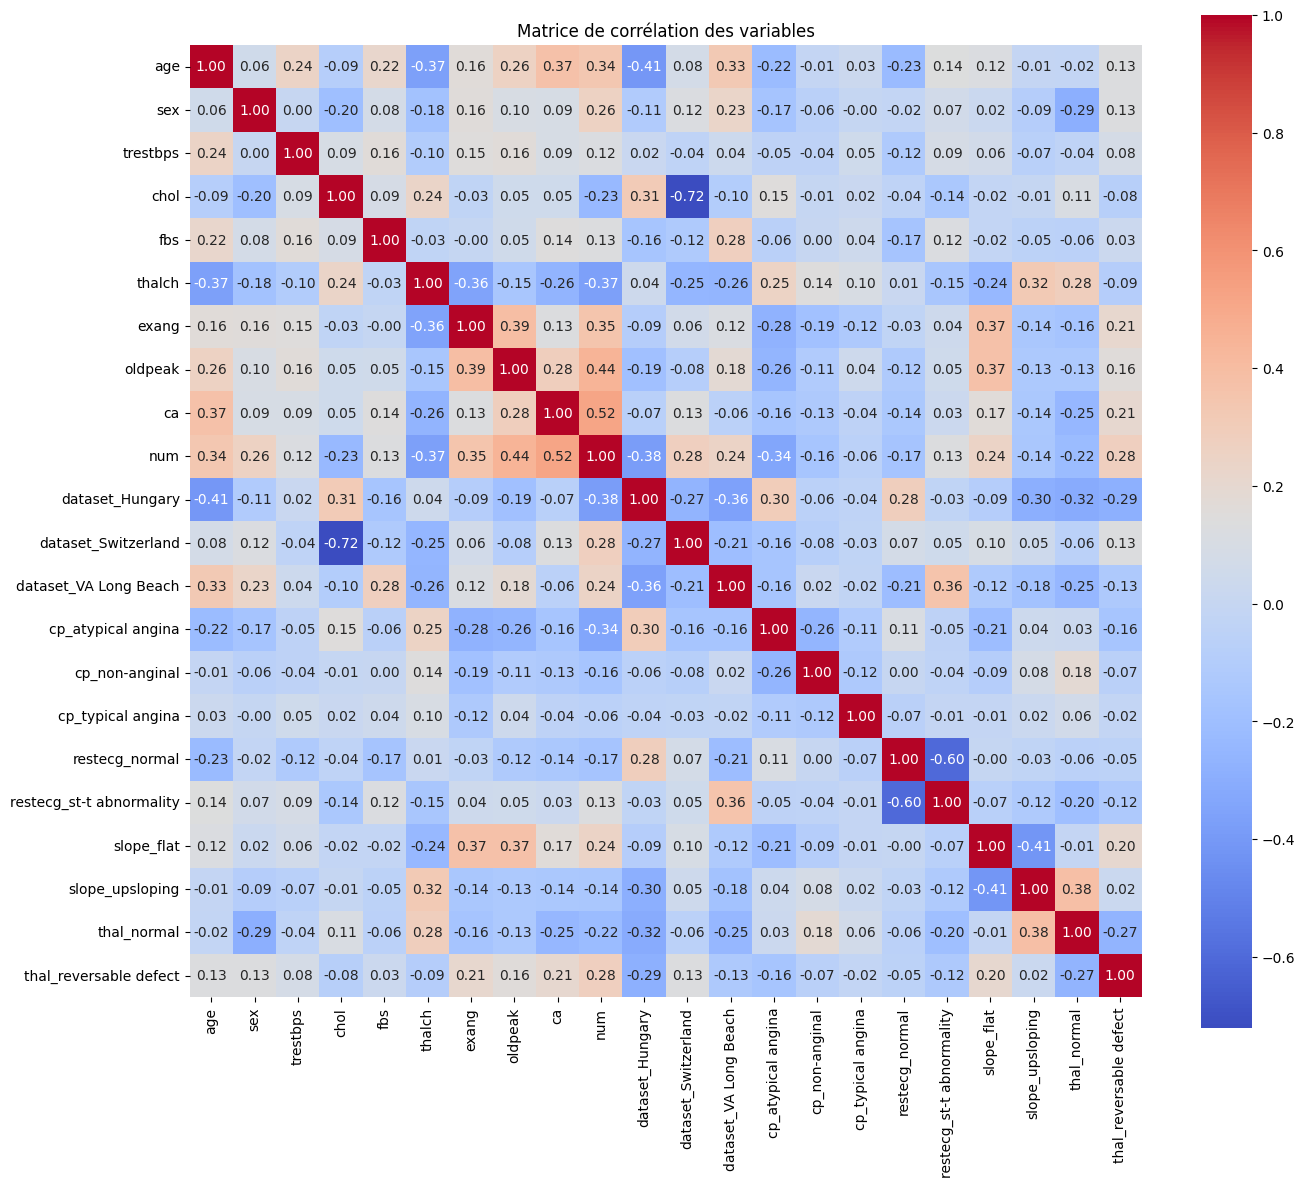

In [59]:

# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.show()

Cible : num (présence de maladie cardiaque)
Elle est souvent codée :

0 → absence de maladie

1 à 4 → différents niveaux de maladie


Corrélations positives avec num : Cela signifie que lorsque la variable augmente, le risque de maladie augmente aussi.

| Variable                                   | Corrélation approx. | Interprétation métier                                                                         |
| ------------------------------------------ | ------------------- | --------------------------------------------------------------------------------------------- |
| `exang` (angine induite par l'effort)      | **+0.43**           | Si une personne a une angine à l'effort, elle a plus de chance d’avoir une maladie cardiaque. |
| `oldpeak` (dépression ST après effort)     | **+0.42**           | Un `oldpeak` élevé indique une réponse anormale à l’effort, souvent lié à l’ischémie.         |
| `slope_flat`                               | **+0.35**           | Un segment ST plat à l'ECG d'effort peut indiquer une mauvaise récupération cardiaque.        |
| `cp_asymptomatic` (douleur asymptomatique) | **+0.31**           | Les douleurs atypiques ou absentes sont souvent associées à des formes graves.                |


Corrélations négatives avec num :
Cela signifie que lorsque la variable augmente, le risque de maladie diminue.

| Variable                            | Corrélation approx. | Interprétation métier                                                                              |
| ----------------------------------- | ------------------- | -------------------------------------------------------------------------------------------------- |
| `thalach` (fréquence cardiaque max) | **–0.42**           | Une bonne capacité à atteindre une fréquence cardiaque élevée est un bon signe de santé cardiaque. |
| `cp_typical angina`                 | **–0.32**           | Une douleur thoracique classique est parfois liée à des cas moins sévères.                         |
| `slope_upsloping`                   | **–0.31**           | Une pente montante du segment ST est généralement un bon signe.                                    |
| `sex` (homme = 1)                   | **+0.28**           | Les hommes sont globalement plus à risque de maladie cardiaque dans ce dataset.                    |


chol (cholestérol) et trestbps (pression au repos) ont une faible corrélation avec num, ce qui peut sembler contre-intuitif. Cela peut être dû à une prise de médicaments, ou à une population déjà suivie médicalement.

fbs (glycémie à jeun > 120 mg/dl) n’est pas fortement corrélé avec num, suggérant qu’elle n’est pas un facteur déterminant isolé.

In [60]:
# Selection des fonctionnalités

#X : contient toutes les variables explicatives (features), sauf num, qui est la variable cible.
#y : la variable cible num est transformée :
#Si num > 0 (niveau de maladie 1 à 4) → on attribue 1
#Si num == 0 (pas de maladie) → on attribue 0

#Cela transforme le problème de classification multi-classes (0 à 4) en un problème binaire :
#"malade" (1) ou "non malade" (0).

X = df.drop("num", axis=1)
y = df["num"].apply(lambda x: 1 if x > 0 else 0)  # présence de maladie (1) ou non (0)

# Normalisation

#Le StandardScaler centre chaque colonne de X sur 0 et la réduit à une variance de 1 :
#De nombreux algorithmes (régression logistique, SVM, KNN...) fonctionnent mieux lorsque les variables sont normalisées.
#Cela évite qu’une variable avec de grandes valeurs (ex. : cholestérol) domine une autre (ex. : exang = 0 ou 1).


# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#X_scaled : les variables explicatives prêtes pour l’entraînement
#y : la cible binaire (0 = sain, 1 = malade)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Choix du modèle :
La régression logistique, adaptée aux problèmes de classification binaire.

In [61]:
# Entrainement du modèle :

model = LogisticRegression()
model.fit(X_train, y_train)


/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ 

LogisticRegression()

In [62]:
# Prédictions
y_pred = model.predict(X_test)

/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Accuracy: 0.8369565217391305
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        75
           1       0.88      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Matrice de confusion:


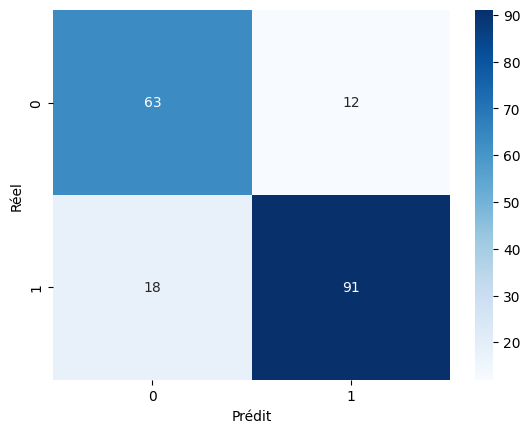

In [63]:
# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:")


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

|                           | Prédit : Non malade (0) | Prédit : Malade (1)      |
| ------------------------- | ----------------------- | ------------------------ |
| **Réel : Non malade (0)** | **63** (vrai négatif) | **12** (faux positif) |
| **Réel : Malade (1)**     | **18** (faux négatif) | **91** (vrai positif)  |


Interprétation métier
Vrais positifs (91)
Le modèle a correctement identifié 91 patients malades.
C’est ce qu’on cherche le plus en médecine préventive.

Vrais négatifs (63)
Le modèle a aussi bien reconnu 63 patients non malades.
Cela évite les examens inutiles.


Faux positifs (12)
12 personnes non malades ont été diagnostiquées comme malades par erreur.
Cela peut engendrer :

stress inutile

examens complémentaires coûteux

Mais ce type d'erreur est souvent acceptable en médecine préventive si on veut minimiser les faux négatifs.

Faux négatifs (18)
18 personnes malades ont été classées à tort comme non malades.
Ce sont les erreurs les plus critiques en santé :

le patient passe à côté du diagnostic

retard de traitement

Le modèle est globalement performant, car il détecte bien les vrais cas malades (91).

Il fait peu d'erreurs critiques (18 faux négatifs).

Il est plutôt bien équilibré entre sensibilité et précision.



In [64]:
# Autre modèle :

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Fonction d’évaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_knn, "KNN")



--- Random Forest ---
Accuracy: 0.842391304347826
Precision: 0.9
Recall: 0.8256880733944955
F1 Score: 0.861244019138756

--- SVM ---
Accuracy: 0.8641304347826086
Precision: 0.8888888888888888
Recall: 0.8807339449541285
F1 Score: 0.8847926267281107

--- KNN ---
Accuracy: 0.8260869565217391
Precision: 0.8737864077669902
Recall: 0.8256880733944955
F1 Score: 0.8490566037735849


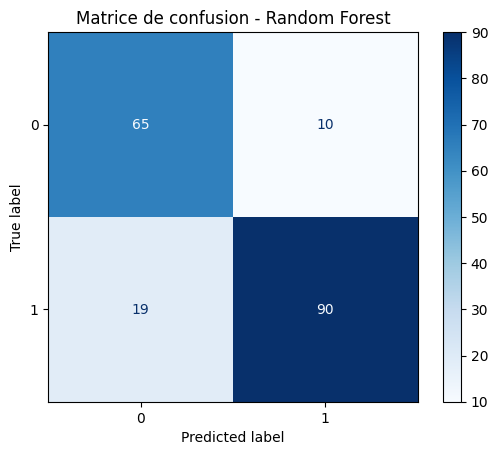

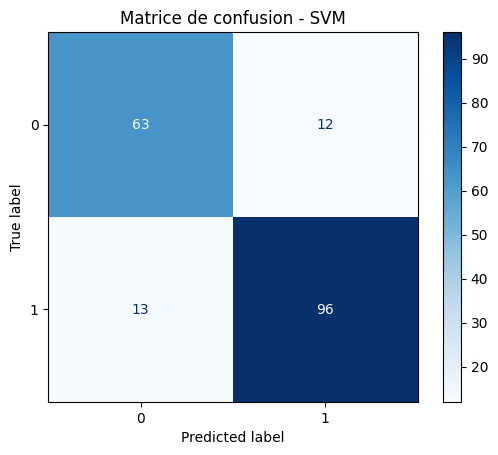

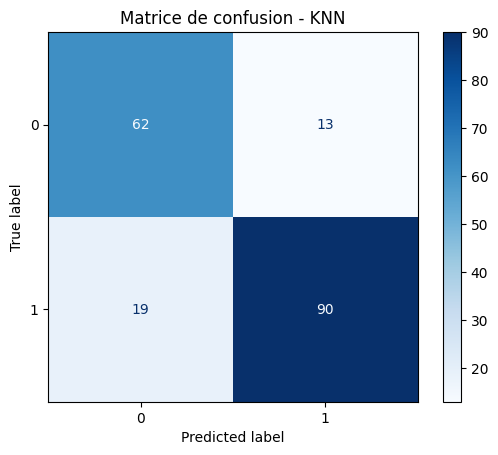

In [65]:
models = {
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn
}

for name, y_pred in models.items():
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    disp.ax_.set_title(f"Matrice de confusion - {name}")
    plt.show()

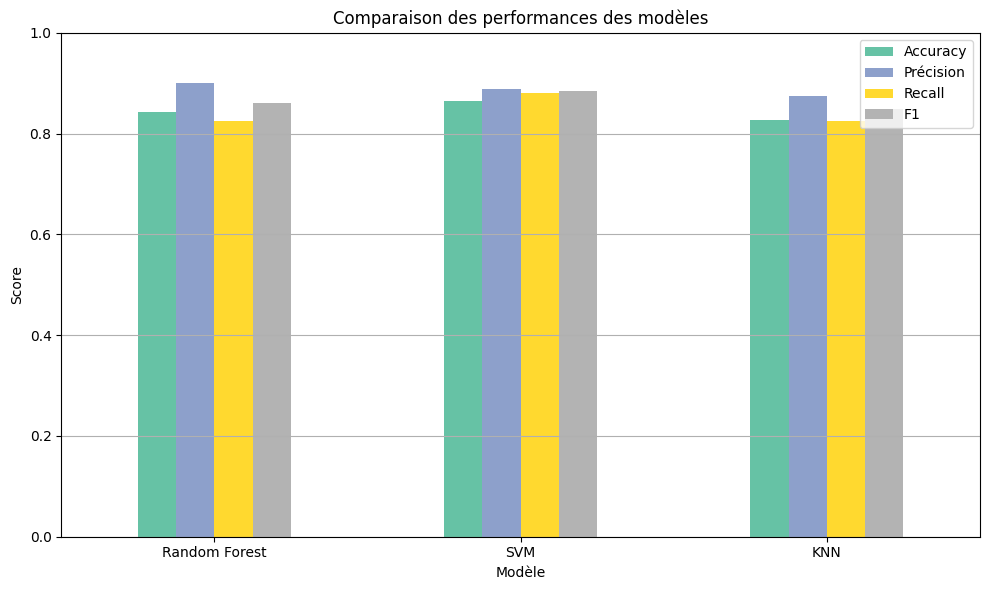

In [66]:
# Collecte des scores
results = []

for name, y_pred in models.items():
    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Précision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results).set_index("Modèle")

# Barplot
df_results.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Comparaison des performances des modèles")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Random Forest
Très bonne précision (≈ 90%) : peu de faux positifs → bon pour éviter les faux diagnostics.

Rappel un peu plus faible : il rate encore quelques malades, ce qui est risqué en médecine.

➕ Très fiable quand il prédit une maladie.

➖ Moins agressif pour "aller chercher" les cas difficiles.

SVM (Support Vector Machine)
Très équilibré : précision, rappel et F1 proches, tous à un haut niveau (≈ 89%).

➕ Bon compromis global : détecte bien les malades tout en limitant les erreurs.

➖ Légèrement en retrait en précision par rapport à Random Forest.

KNN (K-Nearest Neighbors)
Le plus modeste des trois en performance.

➖ Moins précis et moins de rappel → risque de faux positifs et de faux négatifs.

➕ Simple à interpréter mais moins robuste ici.



| Besoin métier                         | Modèle recommandé     | Pourquoi ?                                |
| ------------------------------------- | --------------------- | ----------------------------------------- |
| **Éviter de rater un patient malade** |  **SVM**             | Meilleur **rappel** + bon F1 (équilibre)  |
| **Réduire les faux diagnostics**      |  **Random Forest**   | Meilleure **précision**                   |
| **Modèle rapide à comprendre**        |  KNN (moins fiable) | Moins performant, mais simple à expliquer |



In [68]:
#Optimisation avec GridSearchCV (Logistic Regression)

# Paramètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score F1 :", grid.best_score_)


Meilleurs paramètres : {'C': 0.01, 'solver': 'liblinear'}
Meilleur score F1 : 0.8517790989913753


/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leamariani/Library/Python/3.9/lib/python/site-package

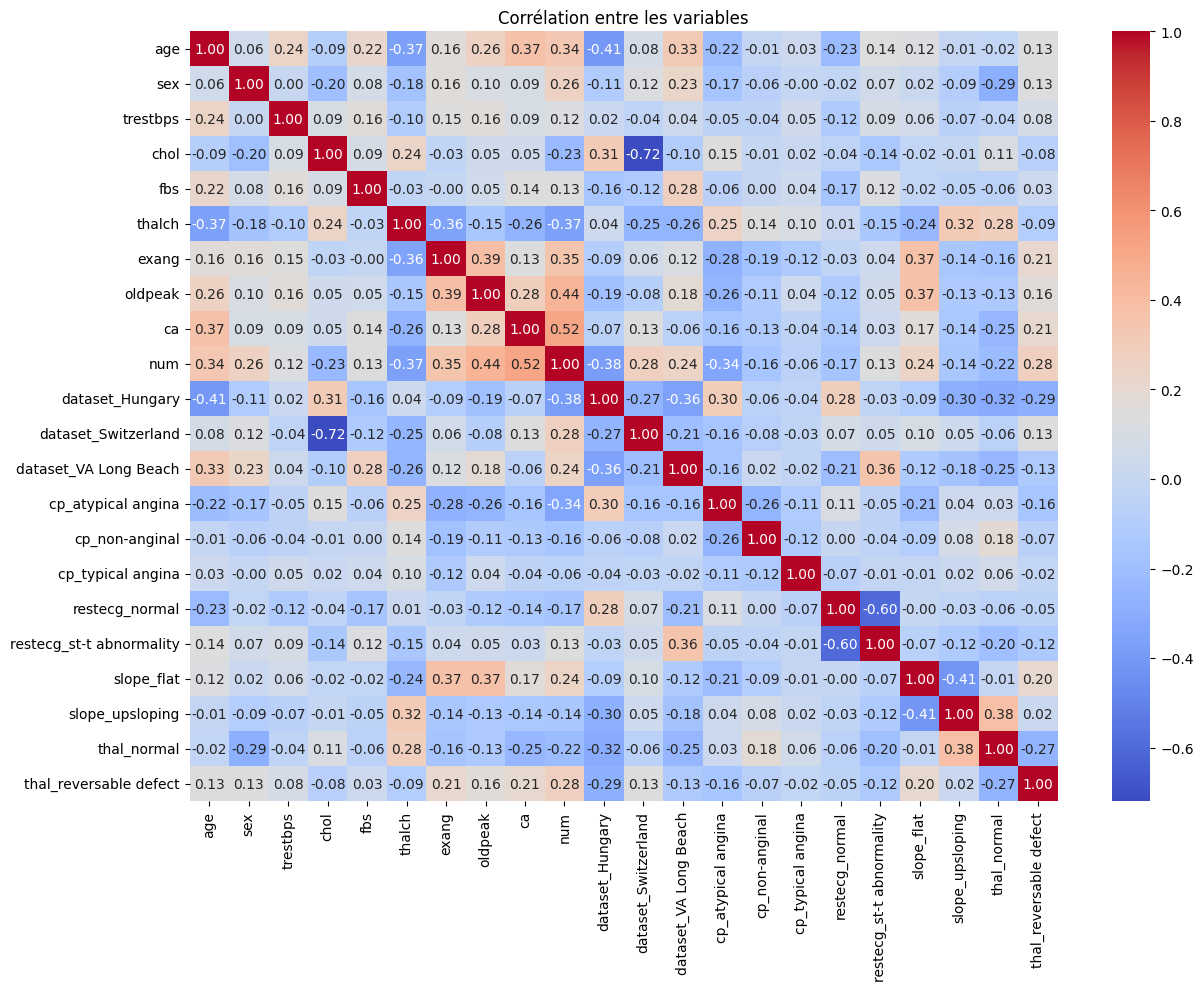

In [ ]:
# heatmap des corrélations

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()

#Détecter des liens forts ou redondants entre variables (multicolinéarité).


slope_flat est modérément corrélé à oldpeak → logique, car tous deux liés à la réponse à l'effort.

thal_reversable defect est anticorrélé à thal_normal → car ce sont des catégories exclusives.

dataset_* (pays/source) influence légèrement num, suggérant des biais selon les hôpitaux.

La variable cible num est fortement influencée par des indicateurs d’effort (exang, oldpeak, slope).

Des signes cliniques comme cp (douleur thoracique), thal, ca sont également très révélateurs.

Certaines variables (chol, fbs, restecg) ont une corrélation faible avec la maladie → elles seules ne suffisent pas à prédire.

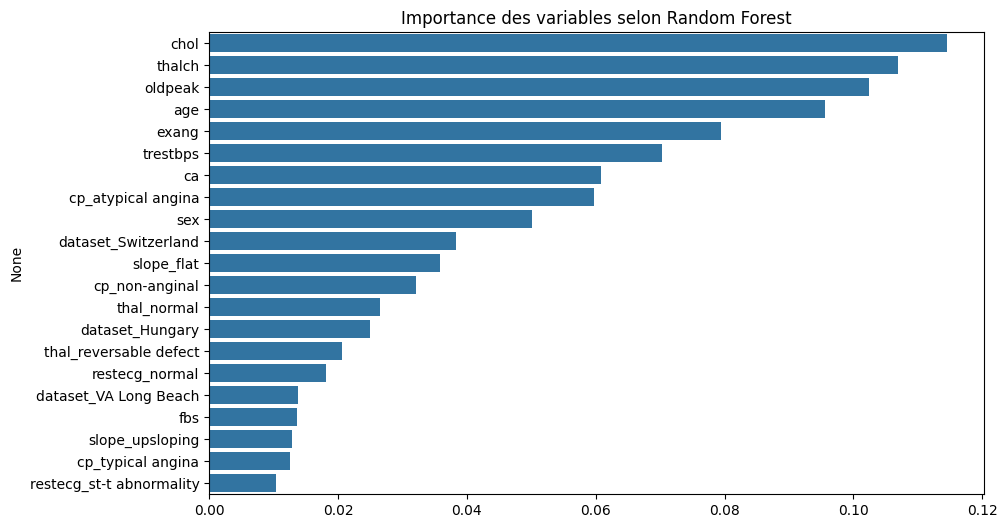

In [74]:
# Importance des variables :

# Récupérer les importances
importances = rf.feature_importances_
features = X.columns

# Trier et afficher
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importance des variables selon Random Forest")
plt.show()

| Variable    | Interprétation médicale rapide                                                                             |
| ----------- | ---------------------------------------------------------------------------------------------------------- |
| **chol**    | Le **cholestérol** est l’indicateur **le plus utilisé** par le modèle → il reste un facteur de risque clé. |
| **thalch**  | Une **fréquence cardiaque maximale plus faible** est un signe d’effort anormal → indicateur de maladie.    |
| **oldpeak** | Une **dépression du segment ST** post-effort est souvent signe d'ischémie cardiaque.                       |
| **age**     | Le **risque augmente avec l'âge** – sans surprise.                                                         |
| **exang**   | L’**angine à l’effort** est un symptôme fort de pathologie coronarienne.                                   |


Le modèle confirme l’importance des indicateurs biologiques (cholestérol, FC max), des résultats d’épreuves d’effort (oldpeak, exang) et de l’âge comme principaux facteurs prédictifs de la maladie cardiaque.
Ces résultats renforcent la validité clinique du modèle, et montrent que l’IA peut efficacement aider au dépistage précoce en se basant sur des données standards.

Utilisation recommandée : en complément du diagnostic médical, pour prioriser les examens ou alerter sur des profils à risque.